In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("../dataset/heart.csv")

In [9]:
# Initialize LabelEncoder.
label_encoder = LabelEncoder()

# Select columns with categorical data.
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column.
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [10]:

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [12]:
# Single model.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[66 11]
 [15 92]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84        77
           1       0.89      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



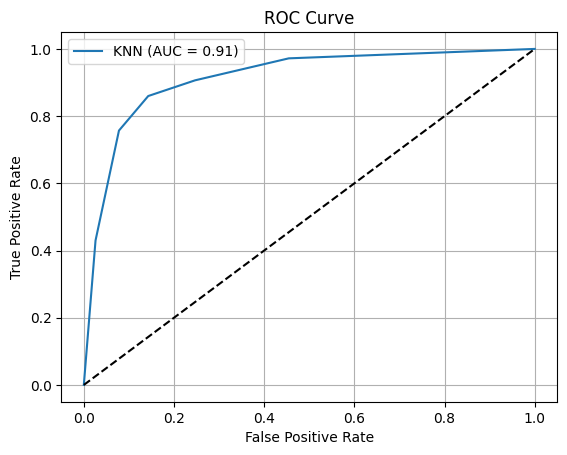

In [16]:
# Get predicted probabilities.
y_probs = knn.predict_proba(X_test)[:, 1]

# ROC curve.
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()